# Program to recognise instruments present in a musical file

In [2]:
#importing packages

import matplotlib.pyplot as plt
import numpy as np
import os
import librosa
import librosa.display
import keras
from keras import layers
import keras.backend as K
import random
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt


c:\users\rangr\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\rangr\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
c:\users\rangr\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


# Importing the musical files from the dataset

In [3]:
MUSIC = r'D:\Genre Classification\Instrument'
music_dataset = []
genre_target = []

for i in os.listdir(MUSIC):
    for j in os.listdir(MUSIC + "\\" + i):
        if i == 'bass_electronic':
            y,_ = librosa.load(MUSIC + "\\" + i + "\\" + j)
            length = len(y)
            for j in range(2):
                if (j+1)*2*22050<=length:
                    music_dataset.append(y[j*2*22050:(j+1)*2*22050]) # append adds the data to the array in the next colunm
                    genre_target.append(0)
        elif i == 'bass_synthetic':
            y,_ = librosa.load(MUSIC + "\\" + i + "\\" + j)
            length = len(y)
            for j in range(2):
                if (j+1)*2*22050<=length:
                    music_dataset.append(y[j*2*22050:(j+1)*2*22050])
                    genre_target.append(1)
        elif i == 'brass_acoustic':
            y,_ = librosa.load(MUSIC + "\\" + i + "\\" + j)
            length = len(y)
            for j in range(2):
                if (j+1)*2*22050<=length:
                    music_dataset.append(y[j*2*22050:(j+1)*2*22050])
                    genre_target.append(2)            
        elif i == 'flute_synthetic':
            y,_ = librosa.load(MUSIC + "\\" + i + "\\" + j)
            length = len(y)
            for j in range(2):
                if (j+1)*2*22050<=length:
                    music_dataset.append(y[j*2*22050:(j+1)*2*22050])
                    genre_target.append(3)
        elif i == 'guitar_acoustic':
            y,_ = librosa.load(MUSIC + "\\" + i + "\\" + j)
            length = len(y)
            for j in range(2):
                if (j+1)*2*22050<=length:
                    music_dataset.append(y[j*2*22050:(j+1)*2*22050])
                    genre_target.append(4)   
        elif i == 'guitar_electronic':
            y,_ = librosa.load(MUSIC + "\\" + i + "\\" + j)
            length = len(y)
            for j in range(2):
                if (j+1)*2*22050<=length:
                    music_dataset.append(y[j*2*22050:(j+1)*2*22050])
                    genre_target.append(5)
        elif i == 'keyboard_acoustic':
            y,_ = librosa.load(MUSIC + "\\" + i + "\\" + j)
            length = len(y)
            for j in range(2):
                if (j+1)*2*22050<=length:
                    music_dataset.append(y[j*2*22050:(j+1)*2*22050])
                    genre_target.append(6)         
        elif i == 'keyboard_electronic':
            y,_ = librosa.load(MUSIC + "\\" + i + "\\" + j)
            length = len(y)
            for j in range(2):
                if (j+1)*2*22050<=length:
                    music_dataset.append(y[j*2*22050:(j+1)*2*22050])
                    genre_target.append(7)              
        elif i == 'keyboard_synthetic':
            y,_ = librosa.load(MUSIC + "\\" + i + "\\" + j)
            length = len(y)
            for j in range(2):
                if (j+1)*2*22050<=length:
                    music_dataset.append(y[j*2*22050:(j+1)*2*22050])
                    genre_target.append(8)     
        elif i == 'vocal_synthetic':
            y,_ = librosa.load(MUSIC + "\\" + i + "\\" + j)
            length = len(y)
            for j in range(2):
                if (j+1)*2*22050<=length:
                    music_dataset.append(y[j*2*22050:(j+1)*2*22050])
                    genre_target.append(9) 
        elif i == 'organ_electronic':
            y,_ = librosa.load(MUSIC + "\\" + i + "\\" + j)
            length = len(y)
            for j in range(2):
                if (j+1)*2*22050<=length:
                    music_dataset.append(y[j*2*22050:(j+1)*2*22050])
                    genre_target.append(10)                     

In [4]:
total_no = len(music_dataset)
print(total_no)

2988


# Finding features from the musical files

In [5]:
zcr = np.zeros(total_no)
centroid = np.zeros(total_no)
rolloff = np.zeros(total_no)
bandwidth=np.zeros(total_no)

mfcc = np.zeros((total_no,20,87))

for i in range(total_no):
    zcr[i] = np.mean(librosa.feature.zero_crossing_rate(music_dataset[i])[0])
    centroid[i] = np.mean(librosa.feature.spectral_centroid(y=music_dataset[i], sr=22050)[0])
    rolloff[i] = np.mean(librosa.feature.spectral_rolloff(y=music_dataset[i], sr=22050)[0])
    bandwidth[i]=np.mean(librosa.feature.spectral_bandwidth(y=music_dataset[i], sr=22050)[0])
    mfcc[i] = librosa.power_to_db(librosa.feature.mfcc(y=music_dataset[i], sr=22050), ref=np.max)

In [6]:
zcr_min = np.amin(zcr)
zcr_max = np.amax(zcr)
centroid_min = np.amin(centroid)
centroid_max = np.amax(centroid)
rolloff_min = np.amin(rolloff)
rolloff_max = np.amax(rolloff)
bandwidth_min=np.amin(bandwidth)
bandwidth_max=np.amax(bandwidth)

In [7]:
#Normalization
numeric_features = np.zeros((total_no,4))
numeric_features[:,0] = (zcr-zcr_min)/(zcr_max-zcr_min)
numeric_features[:,1] = (centroid-centroid_min)/(centroid_max-centroid_min)
numeric_features[:,2] = (rolloff-rolloff_min)/(rolloff_max-rolloff_min)
numeric_features[:,3] = (bandwidth-bandwidth_min)/(bandwidth_max-bandwidth_min)

In [8]:
print(np.shape(mfcc))
print(np.shape(numeric_features))

(2988, 20, 87)
(2988, 4)


# Pre-Processing the dataset

In [13]:
#Shuffling the dataset
X_numeric = np.zeros(np.shape(numeric_features))
X_mfcc = np.zeros((2988,20,87,1))
Y = np.zeros(len(genre_target))

shuffle_index = [i for i in range(total_no)]
random.shuffle(shuffle_index)
for i in range(total_no):
    X_numeric[i] = numeric_features[shuffle_index[i]]
    X_mfcc[i,:,:,0] = mfcc[shuffle_index[i]]
    Y[i] = genre_target[shuffle_index[i]]

In [14]:
#splitting the dataset to train and test set
X_train_numeric = X_numeric[:1494]
X_train_mfcc = X_mfcc[:1494]
Y_train = Y[:1494]

X_test_numeric = X_numeric[1494:]
X_test_mfcc = X_mfcc[1494:]
Y_test = Y[1494:]

# Feeding it to the Neural Network

In [15]:
numeric = keras.Input(shape=(4,))
image= keras.Input(shape=(20,87,1))

x = layers.Dense(16, activation="relu")(numeric)
x = layers.Dense(8, activation="relu")(x)
x = keras.Model(inputs=numeric, outputs=x)



y = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(image)
y = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(y)
y = layers.MaxPooling2D((2, 4), padding='same')(y)
 
y = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(y)
y = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(y)
y = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(y)
y = layers.MaxPooling2D((2, 4), padding='same')(y)
 
y = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(y)
y = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(y)
y = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(y)
y = layers.MaxPooling2D((2, 4), padding='same')(y)



y = layers.Flatten()(y)
y = keras.Model(inputs=image, outputs=y)

combined = layers.concatenate([x.output, y.output])

z = layers.Dense(1024, activation="relu")(combined)

z = layers.Dense(256, activation="relu")(z)

z = layers.Dense(11, activation="softmax")(z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Fitting our neural network
model.fit([X_train_numeric,X_train_mfcc],Y_train,epochs=25,batch_size=3)

Epoch 1/25
498/498 [==============================] - 15s 28ms/step - loss: 0.7698 - accuracy: 0.7135
Epoch 2/25
498/498 [==============================] - 14s 28ms/step - loss: 0.6258 - accuracy: 0.7751
Epoch 3/25
498/498 [==============================] - 14s 29ms/step - loss: 0.4651 - accuracy: 0.8226
Epoch 4/25
498/498 [==============================] - 14s 28ms/step - loss: 0.4744 - accuracy: 0.8206
Epoch 5/25
498/498 [==============================] - 14s 28ms/step - loss: 0.4594 - accuracy: 0.8246
Epoch 6/25
498/498 [==============================] - 14s 28ms/step - loss: 0.4126 - accuracy: 0.8447
Epoch 7/25
498/498 [==============================] - 14s 28ms/step - loss: 0.3393 - accuracy: 0.8722
Epoch 8/25
498/498 [==============================] - 15s 30ms/step - loss: 0.3173 - accuracy: 0.88690s - loss: 0.3
Epoch 9/25
498/498 [==============================] - 15s 31ms/step - loss: 0.4208 - accuracy: 0.8561
Epoch 10/25
498/498 [==============================] - 17s 33ms/step

In [21]:
test_loss, test_acc = model.evaluate([X_test_numeric,X_test_mfcc],Y_test)
print(test_acc)

47/47 [==============================] - 2s 40ms/step - loss: 0.5516 - accuracy: 0.8246
0.8246318697929382


# The following is to check prediction for a custom input:

In [22]:
def probability(y):
    
    test_dataset = []
    length = len(y)
    for j in range(1000):
        if (j+1)*2*22050<=length:
            test_dataset.append(y[j*2*22050:(j+1)*2*22050])
            
    total_no_test = len(test_dataset)
    
    zcr_test = np.zeros(total_no_test)
    centroid_test = np.zeros(total_no_test)
    rolloff_test = np.zeros(total_no_test)
    mfcc_test = np.zeros((total_no_test,20,87,1))

    for i in range(total_no_test):
        zcr_test[i] = np.mean(librosa.feature.zero_crossing_rate(test_dataset[i])[0])
        centroid_test[i] = np.mean(librosa.feature.spectral_centroid(y=test_dataset[i], sr=22050)[0])
        rolloff_test[i] = np.mean(librosa.feature.spectral_rolloff(y=test_dataset[i], sr=22050)[0])
        mfcc_test[i,:,:,0] = librosa.power_to_db(librosa.feature.mfcc(y=test_dataset[i], sr=22050), ref=np.max)
        
    numeric_features_test = np.zeros((total_no_test,4))
    numeric_features_test[:,0] = (zcr_test-zcr_min)/(zcr_max-zcr_min)
    numeric_features_test[:,1] = (centroid_test-centroid_min)/(centroid_max-centroid_min)
    numeric_features_test[:,2] = (rolloff_test-rolloff_min)/(rolloff_max-rolloff_min)
    numeric_features[:,3] = (bandwidth-bandwidth_min)/(bandwidth_max-bandwidth_min)
    
    return (model.predict([numeric_features_test,mfcc_test]))

# Instrument Recognition Example

 guitar_acoustic


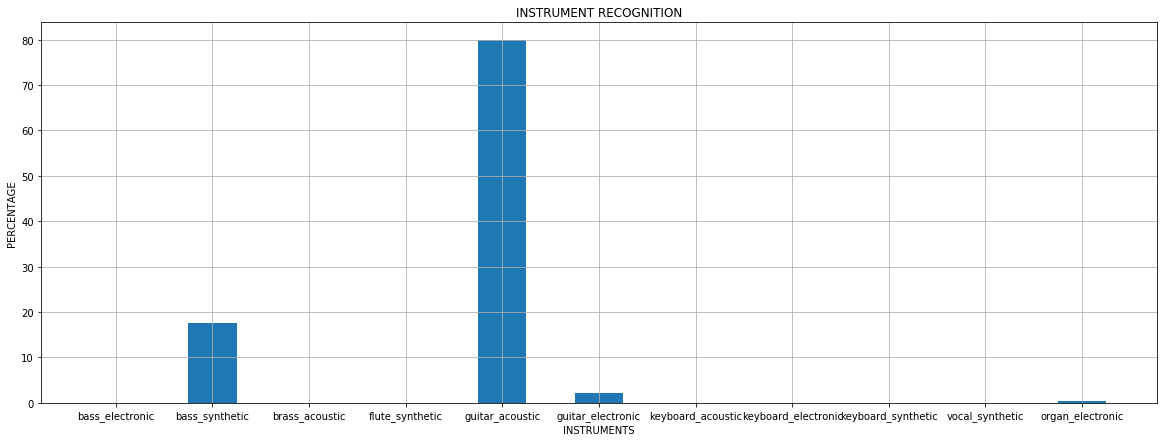

In [23]:
y,sr = librosa.load(r'D:\Genre Classification\Instrument\nsynth-test\audio\guitar_acoustic_021-051-100.wav')
prob = probability(y)
x=np.array(['bass_electronic','bass_synthetic','brass_acoustic','flute_synthetic','guitar_acoustic','guitar_electronic','keyboard_acoustic','keyboard_electronic','keyboard_synthetic','vocal_synthetic','organ_electronic'])
row = np.shape(prob)
rows=row[0]
column_sums=(prob.sum(axis=0))/rows
max_1=np.argmax(column_sums)
print("",x[max_1])
plt.figure(figsize=(20,7))
plt.bar(x,column_sums*100,width=0.5)
plt.title('INSTRUMENT RECOGNITION')
plt.xlabel('INSTRUMENTS')
plt.ylabel('PERCENTAGE')
plt.grid()
plt.show()